## STAT 207 Lab 12: Regularized Linear Regression

Due: Wednesday, December 11, 23:59:59

### YOUR NAME AND NET ID HERE

This lab consists of 4 main parts. You may add as many cells as you need in order to do the exercises. To add cells use the "Insert" tab from the menu bar above and select "insert cell above" or "insert cell below". 

Please use Markdown cells above or below your code cells to explain your results. Make sure graders know that you understand what your code is doing.

**Hint: all of the problems build on the class notes, so the notes are the first place to go for related examples and discussion.**


This lab again uses the data in the two files: "clinical_data.csv" and "gene_expr.csv". Both files refer to subjects in a study on using gene expression data to predict recurrence of breast cancer among patients treated with tamoxifan. 

**We consider the question: are any of these gene expressions associated with age?**

+ "clinical_data.csv" contains information about patient status such as age, size of tumor when treated, and whether or not they had a recurrence of breast cancer: Status='R' means they had a recurrence. Status='RF' means they were recurrence free.

+ "gene_expr.csv" contains gene expression measurements for a sample of 50 genes.

The rows of the two files correspond to the same patients, e.g., the 10th row in each file refers to the same patient, in one file, her clinical status, and in the other file, her gene expression information.

### Part 1: Data Preparation (3 pts)

**a) (1 pt) Read the gene expression data into a feature matrix (data frame) X. Display the dimensions of X and its first few rows, including column names.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
X = pd.read_csv('gene_expr.csv')
X.head(10)

,X159,X960,X980,X986,X1023,X1028,X1064,X1092,X1103,X1109,...,X1563,X1574,X1595,X1597,X1609,X1616,X1637,X1656,X1657,X1683
0,0.739512,1.971036,-1.660842,2.777183,3.299062,-1.954834,2.784970,0.411848,3.974931,-0.979751,...,3.221117,-1.735267,-2.036134,3.114202,-1.567229,-2.100264,-2.067843,2.116261,-2.057195,-0.868534
1,2.037903,2.197854,-1.263034,4.082346,5.426886,-1.732520,3.085890,0.688056,4.503384,-1.185032,...,2.927229,-1.646363,0.127756,2.772590,-1.451107,0.267480,-1.526069,2.643856,-1.625604,-1.415037
2,2.218338,3.471559,-1.789433,2.829994,4.746466,-2.222392,2.977280,0.944858,4.021099,-1.825502,...,3.565945,-2.296393,-2.347923,3.577213,-2.175087,-2.084889,-2.106915,2.738768,-1.387816,-0.780555
3,0.972344,2.638734,-2.010999,3.913935,4.744161,-2.496426,3.139577,0.155651,4.632121,-1.671513,...,3.815160,-1.706846,-2.216318,3.168707,-1.844349,-2.010999,-1.996352,2.797407,-1.743066,-1.010999
4,2.412235,4.033491,-1.536501,4.239650,4.304348,-1.991067,3.700095,0.878536,4.295705,-2.141092,...,4.264107,-2.424026,-2.448274,3.717911,-2.286523,-2.045515,-1.776328,2.813104,-2.353637,-1.687061
5,1.244203,3.485278,-1.838879,3.354405,3.596351,-2.372703,2.537772,-0.042187,4.409049,-1.824082,...,3.870400,-2.081240,-2.229338,3.370172,-2.063752,-1.995848,-1.946939,2.648671,-1.697325,-1.107875
6,1.022242,2.312934,-1.597241,2.838456,4.425506,-1.882643,2.239754,0.777947,4.401796,-1.049753,...,2.605197,-2.145677,-2.219678,3.536966,-1.975752,-1.975752,-2.008174,2.417328,-2.024662,-1.456378
7,1.589521,2.506791,-1.659925,4.276949,4.283059,-1.911463,2.003420,1.284934,4.651143,-2.074962,...,2.540925,-2.496426,-2.548893,4.814187,-2.174498,-2.174498,-2.195256,2.246966,-2.548893,-1.259387
8,1.047177,2.971751,-1.541659,3.551610,4.324723,-1.866498,3.437098,0.301806,5.121727,-1.408392,...,3.552632,-2.138303,-2.138303,2.833941,-1.941266,-1.988060,-1.895942,2.615933,-2.120816,-1.576992
9,1.101824,2.743575,-1.366782,3.725140,4.569959,-1.527247,3.469656,0.828234,4.091210,-1.723939,...,2.476285,-1.660514,-1.790281,2.845405,-1.555816,-1.740241,-1.790281,1.692111,-1.790281,-1.280809


**b) (2 pts) Read the clinical data into a data frame. Create a target array y with the ages of the patients.**

In [3]:
Y = pd.read_csv('clinical_data.csv')

In [4]:
y = Y['Patient age (years)']

### Part 2: Data Summary and Visualization (10 pts)

**a) (2 pts) Plot a density histogram of the ages of the patients in the study.**

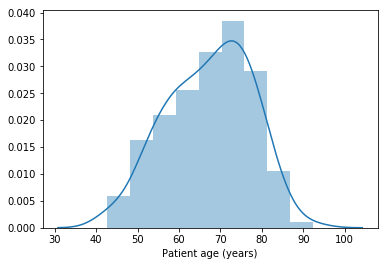

In [5]:
sns.distplot(y, kde = True)

**b) (2 pts) Compute Q1, Median and Q3 (25th, 50th and 75th percentiles) for the patient ages in the study.**

In [6]:
q1 = y.quantile(0.25)
m = y.quantile(0.5)
q3 = y.quantile(0.75)
print('Q1:', q1)
print('Median:', m)
print('Q3:', q3)

Q1: 59.55
Median: 68.2
Q3: 75.05


**c) (3 pts) create an array 'ylevel' that has values assigned as follows:**

$$
\text{ylevel} =
\begin{cases}
0, & \text{if } \text{Age} \lt Q_1\\ 
1, & \text{if } Q_1 \le \text{Age} \lt Median\\
2, & \text{if } Median \le \text{Age} \lt Q_3\\
3, & \text{if } \text{Age} \gt Q_3\\
\end{cases}
$$

**Make a scatter plot of ylevel versus y to show that it worked.**

In [9]:
ylevel = 
ylevel

SyntaxError: invalid syntax (<ipython-input-9-9e4dd303d60a>, line 1)

**d) (3 pts) Create a heat map comparing the mean gene expression levels for the 50 genes between the ordered age groups with ylevel = 0, 1, 2, and 3. For an example see the notes. Thus, in the matrix that you create for the heat map, the rows should correspond to the age group levels, and the columns should correspond to the different genes in $X$. The value in row i and column j of the matrix should be the mean gene expression for gene j among patients in age group i (i=0,1,2,3; j=0,1,...,49).**

### Part 3: Lasso Regression Analysis (6 pts)

**a) (4 pts) As illustrated in the notes, the sklearn.linear_model function Lasso fits linear regression models using L1 penalized least squares to produce sparse coefficient estimates.**

**Fit an L1 regularized regression model to predict age from gene expression values. Try different values of the penalty parameter 'alpha' to make the fitted model end up with at most 3-5 nonzero coefficients. You don't have to show everything you tried, just the one using your final choice for 'alpha'.**

**In order to achieve convergence, it might be necessary to increase the maximum number of interations allowed to at least 1000.**

**b) (2 pts) For the regularized linear regression model you fit in a), display the coefficient vector for the features. How many features have non-zero coefficients?**

### Part 4: Cross-validated mean square error for prediction (6 pts)

**a) (3 pts) Rerun the Lasso regression, with the same alpha you used in Part 3, using 5-fold cross-validation. For scores, estimate the negative mean square error predicting the age of the patient. Display the results for the 5 train/test splits in the cross-validation. For details, see the regularized regression notes and the online documentation for the sklearn function cross_val_score.**

**b) (2 pts) Compute the square-root of the average mean square error (note that the cross validation function produces negative means square errors instead of mean square errors). Also compute the sample standard deviation of age in the data set.** 

**c) (1 pt) Based on the results, does it appear that these 50 gene expressions are useful for predicting age?**